<a href="https://colab.research.google.com/github/Sunny18-2002/IIITH-files/blob/main/LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def cal_cost(theta, X, y):
    m = len(y)
    cost = (1/2*m) * np.sum(np.square(np.dot(X, theta) - y))
    return cost

def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

# Example usage with placeholder data and a new batch size
# Replace X, y, and y_pred with your actual data

# Placeholder data
X = np.random.rand(100, 2)  # Replace with your feature matrix
y = np.random.rand(100, 1)  # Replace with your target vector
y_pred = np.random.randn(3, 1)  # Assuming 3 features including the bias term

# Set the new batch size
new_batch_size = 50

# Call the function with the new batch size
final_theta, cost_history = minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=new_batch_size)

# Print the results
print("Final Theta:", final_theta)
print("Cost History:", cost_history)


Final Theta: [[-0.14297207]
 [-0.80634364]
 [-0.42453401]]
Cost History: [5647.43283851 5487.50599795 5332.36096216 5181.90077703 5035.83187551
 4894.07319917 4756.51933495 4622.97624488 4493.56325    4367.40133042]


In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the diabetes dataset
data = load_diabetes()
X = data.data
y = data.target.reshape(-1, 1)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add a bias term to the features
X = np.c_[np.ones((X.shape[0], 1)), X]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate the cost
def cal_cost(theta, X, y):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return cost

# Gradient Descent
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1 / m) * learning_rate * (X.T.dot(prediction - y))
        cost_history[it] = cal_cost(theta, X, y)

    return theta, cost_history

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, theta)
            theta = theta - learning_rate * (X_i.T.dot((prediction - y_i)))
        cost_history[it] = cal_cost(theta, X, y)

    return theta, cost_history

# Mini-Batch Gradient Descent
def minibatch_gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            prediction = np.dot(X_i, theta)
            theta = theta - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta, X_i, y_i)

        cost_history[it] = cost

    return theta, cost_history

# Initialize theta with random values
theta = np.random.randn(X_train.shape[1], 1)

# Hyperparameters
learning_rate = 0.01
iterations = 1000
batch_size = 20

# Gradient Descent
theta_gd, cost_history_gd = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

# Stochastic Gradient Descent
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_train, y_train, theta, learning_rate, iterations)

# Mini-Batch Gradient Descent
theta_mbgd, cost_history_mbgd = minibatch_gradient_descent(X_train, y_train, theta, learning_rate, iterations, batch_size)

# Evaluate on the test set
def evaluate_model(X, y, theta):
    y_pred = np.dot(X, theta)
    mse = np.mean((y_pred - y)**2)
    return mse

mse_gd = evaluate_model(X_test, y_test, theta_gd)
mse_sgd = evaluate_model(X_test, y_test, theta_sgd)
mse_mbgd = evaluate_model(X_test, y_test, theta_mbgd)

# Print results
print("Mean Squared Error (Gradient Descent):", mse_gd)
print("Mean Squared Error (Stochastic Gradient Descent):", mse_sgd)
print("Mean Squared Error (Mini-Batch Gradient Descent):", mse_mbgd)


Mean Squared Error (Gradient Descent): 2884.2610560542485
Mean Squared Error (Stochastic Gradient Descent): 3027.179097237249
Mean Squared Error (Mini-Batch Gradient Descent): 2884.2560061516087


<ipython-input-5-f4c99906f9d8>:24: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
<ipython-input-5-f4c99906f9d8>:50: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * (X_i.T.dot((prediction - y_i)))


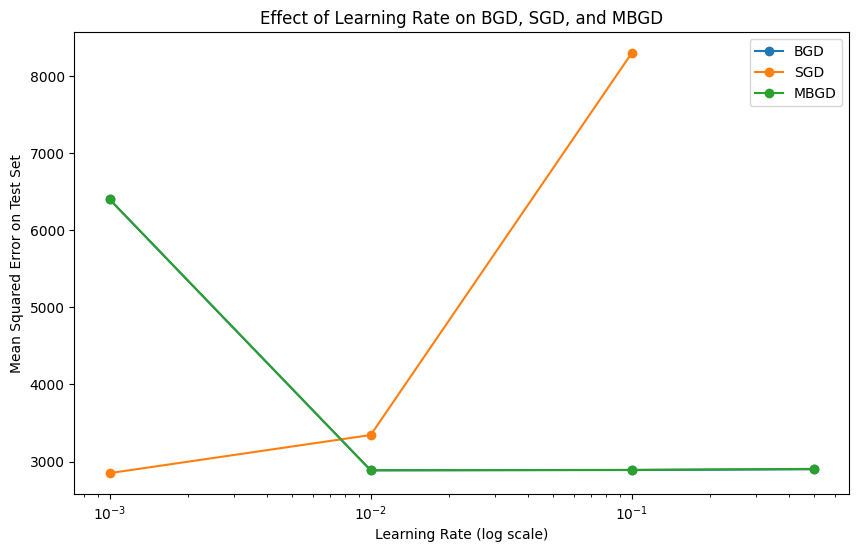

In [ ]:
import matplotlib.pyplot as plt

def compare_learning_rates(X_train, y_train, X_test, y_test, learning_rates):
    # Initialize theta with random values
    theta = np.random.randn(X_train.shape[1], 1)

    # Hyperparameters
    iterations = 1000
    batch_size = 20

    # Results storage
    results = {'BGD': [], 'SGD': [], 'MBGD': []}

    for lr in learning_rates:
        # Batch Gradient Descent
        theta_bgd, _ = gradient_descent(X_train, y_train, theta.copy(), learning_rate=lr, iterations=iterations)
        mse_bgd = evaluate_model(X_test, y_test, theta_bgd)
        results['BGD'].append((lr, mse_bgd))

        # Stochastic Gradient Descent
        theta_sgd, _ = stochastic_gradient_descent(X_train, y_train, theta.copy(), learning_rate=lr, iterations=iterations)
        mse_sgd = evaluate_model(X_test, y_test, theta_sgd)
        results['SGD'].append((lr, mse_sgd))

        # Mini-Batch Gradient Descent
        theta_mbgd, _ = minibatch_gradient_descent(X_train, y_train, theta.copy(), learning_rate=lr, iterations=iterations, batch_size=batch_size)
        mse_mbgd = evaluate_model(X_test, y_test, theta_mbgd)
        results['MBGD'].append((lr, mse_mbgd))

    return results

# Learning rates to compare
learning_rates = [0.001, 0.01, 0.1, 0.5]

# Run the comparison
results = compare_learning_rates(X_train, y_train, X_test, y_test, learning_rates)

# Plot the results
plt.figure(figsize=(10, 6))

for variant in results.keys():
    lrs, mses = zip(*results[variant])
    plt.plot(lrs, mses, marker='o', label=variant)

plt.xscale('log')  # Use log scale for better visualization
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Mean Squared Error on Test Set')
plt.title('Effect of Learning Rate on BGD, SGD, and MBGD')
plt.legend()
plt.show()
